In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"E:\Academics\Notes\Deep Learning\Batch 103 Day 52\Electricity Consumption.csv")

display (df)


,DATE,Humidity,Temperature,Electricity
0,2020-01-01 00:00:00 EST,92,-1.1,914
1,2020-01-01 01:00:00 EST,92,-1.5,887
2,2020-01-01 02:00:00 EST,91,-1.5,865
3,2020-01-01 03:00:00 EST,88,-1.1,852
4,2020-01-01 04:00:00 EST,87,-1.3,852
...,...,...,...,...
8755,2020-12-30 19:00:00 EST,95,-1.2,1180
8756,2020-12-30 20:00:00 EST,93,0.8,1133
8757,2020-12-30 21:00:00 EST,94,1.9,1073
8758,2020-12-30 22:00:00 EST,93,2.2,994


In [3]:
df.dropna(inplace=True)

display (df.shape )


(8760, 4)

In [4]:
df_corr = df.drop('DATE', axis =1)
display(df_corr)



,Humidity,Temperature,Electricity
0,92,-1.1,914
1,92,-1.5,887
2,91,-1.5,865
3,88,-1.1,852
4,87,-1.3,852
...,...,...,...
8755,95,-1.2,1180
8756,93,0.8,1133
8757,94,1.9,1073
8758,93,2.2,994


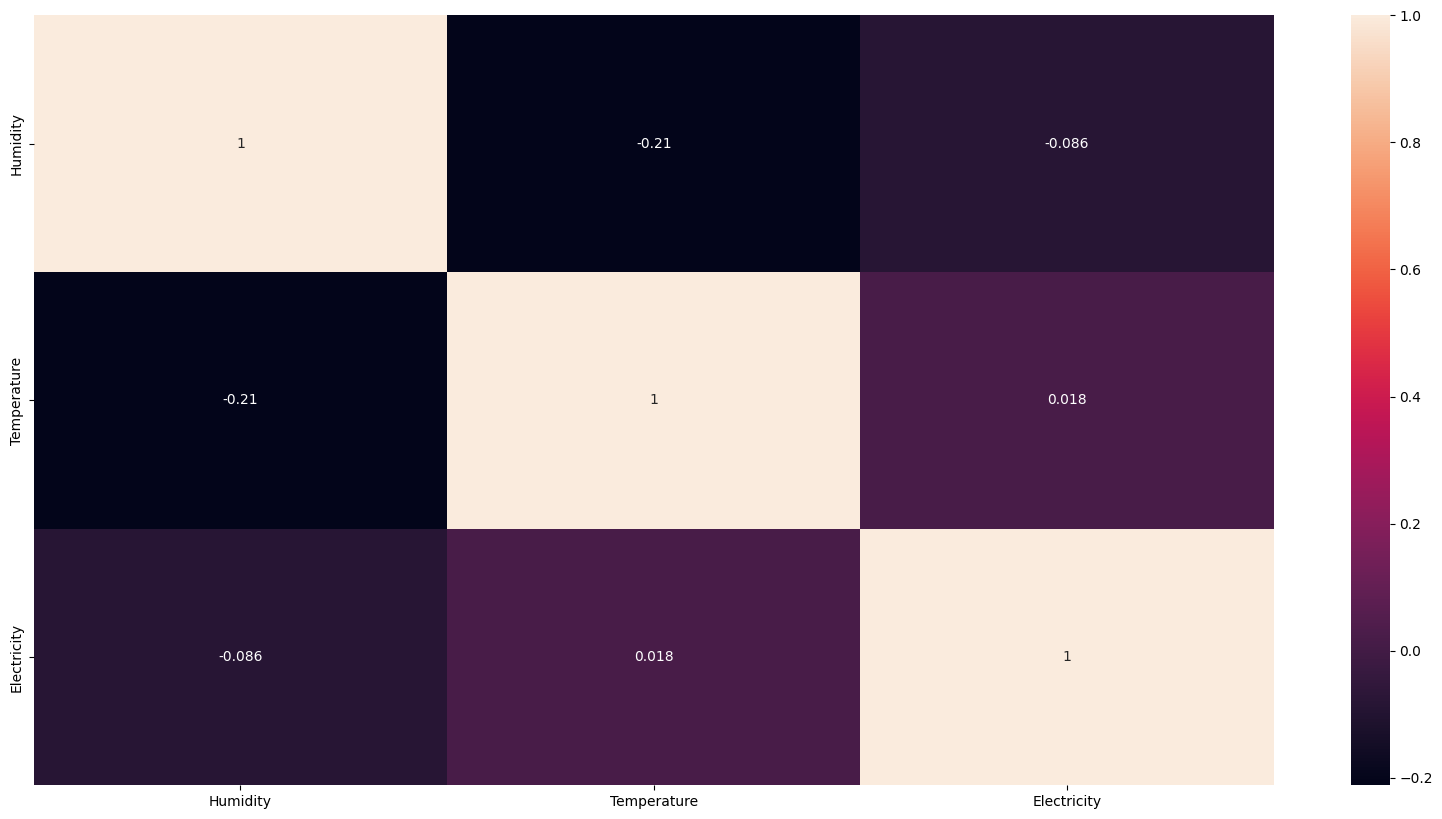

In [5]:
import seaborn as sn

sn.heatmap(df_corr.corr(), annot=True )

plt.show()


In [6]:
training_set = df.iloc[:8712, 1:4].values
display (training_set.shape)
test_set = df.iloc[8712:, 1:4].values
display (test_set.shape)


(8712, 3)

(48, 3)

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set) # Training Set 
test_set_scaled = sc.fit_transform(test_set) # Test Set


In [8]:
test_set_scaled = test_set_scaled[:, 0:2]
display (test_set_scaled)


array([[0.61702128, 0.375     ],
       [0.70212766, 0.30555556],
       [0.68085106, 0.22222222],
       [0.65957447, 0.1875    ],
       [0.65957447, 0.15972222],
       [0.68085106, 0.125     ],
       [0.63829787, 0.08333333],
       [0.63829787, 0.02777778],
       [0.63829787, 0.        ],
       [0.61702128, 0.04166667],
       [0.53191489, 0.09722222],
       [0.46808511, 0.15972222],
       [0.31914894, 0.22222222],
       [0.21276596, 0.28472222],
       [0.14893617, 0.29861111],
       [0.        , 0.34027778],
       [0.04255319, 0.3125    ],
       [0.21276596, 0.21527778],
       [0.27659574, 0.21527778],
       [0.44680851, 0.125     ],
       [0.44680851, 0.13194444],
       [0.53191489, 0.20138889],
       [0.57446809, 0.19444444],
       [0.5106383 , 0.22222222],
       [0.55319149, 0.22916667],
       [0.59574468, 0.20833333],
       [0.59574468, 0.22916667],
       [0.63829787, 0.22916667],
       [0.70212766, 0.23611111],
       [0.72340426, 0.24305556],
       [0.

In [9]:
X_train = []
y_train = []
WS = 24


In [10]:
for i in range(WS, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-WS:i, 0:3])
    y_train.append(training_set_scaled[i,2])


In [11]:
X_train = np.array(X_train)
display (X_train.shape)


(8688, 24, 3)

In [12]:
X_train

array([[[0.91011236, 0.4       , 0.27878788],
        [0.91011236, 0.3936    , 0.25541126],
        [0.8988764 , 0.3936    , 0.23636364],
        ...,
        [0.88764045, 0.408     , 0.39047619],
        [0.82022472, 0.4048    , 0.34372294],
        [0.80898876, 0.4016    , 0.28831169]],

       [[0.91011236, 0.3936    , 0.25541126],
        [0.8988764 , 0.3936    , 0.23636364],
        [0.86516854, 0.4       , 0.22510823],
        ...,
        [0.82022472, 0.4048    , 0.34372294],
        [0.80898876, 0.4016    , 0.28831169],
        [0.76404494, 0.3952    , 0.24848485]],

       [[0.8988764 , 0.3936    , 0.23636364],
        [0.86516854, 0.4       , 0.22510823],
        [0.85393258, 0.3968    , 0.22510823],
        ...,
        [0.80898876, 0.4016    , 0.28831169],
        [0.76404494, 0.3952    , 0.24848485],
        [0.79775281, 0.3856    , 0.22510823]],

       ...,

       [[0.71910112, 0.3408    , 0.41125541],
        [0.74157303, 0.3472    , 0.35930736],
        [0.75280899, 0

In [13]:
y_train = np.array(y_train)
display (y_train.shape)


(8688,)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout


In [15]:
Model = Sequential()

Model.add(LSTM(units = 70, return_sequences = True, input_shape = (X_train.shape[1], 3)))

# Drop out to reduce over fitting remove few neurons 

Model.add(Dropout(0.2))




In [16]:
Model.add(LSTM(units = 70, return_sequences = True))

Model.add(Dropout(0.2))


In [17]:
Model.add(LSTM(units = 70, return_sequences = True))

Model.add(Dropout(0.2))


In [18]:
Model.add(LSTM(units = 70))

Model.add(Dropout(0.2))


In [19]:
Model.add(Dense(units = 1))

In [20]:
Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
Model.fit(X_train,y_train, epochs = 80, batch_size = 32)

Epoch 1/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - loss: 0.0242
Epoch 2/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - loss: 0.0064
Epoch 3/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 0.0055
Epoch 4/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - loss: 0.0052
Epoch 5/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - loss: 0.0046
Epoch 6/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0041
Epoch 7/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0032
Epoch 8/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0025
Epoch 9/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0021
Epoch 10/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0018
Epoch 11/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0016
Epoch 12/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0015
Epoch 13/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0014
Epoch 14/80
272/272 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0013
Epoch 15/80
272/272 ━━━━━━━━━

In [22]:
prediction_test = []

# Batch one is last 24 hours data 
Batch_one = training_set_scaled[-24:]

# Prediction with three input variables 
# Reshape Batch one , Three input features 

Batch_New = Batch_one.reshape((1,24,3))


In [23]:
for i in range(48):
    
    # First Prediction is based on last 24 periods 
    First_pred = Model.predict(Batch_New)[0]
    
    prediction_test.append(First_pred)
    
    # This will have independent variable test set ie Humidity and Temperature
    New_var = test_set_scaled[i,:]
    
    # Reshape independent variable
    New_var = New_var.reshape(1,2)
    
    # Add previous prediction to test data 

    New_test = np.insert(New_var, 2, [First_pred], axis =1)
    
    New_test = New_test.reshape(1,1,3)
    
    Batch_New = np.append(Batch_New[:,1:,:], New_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━

In [24]:
prediction_test = np.array(prediction_test)

display (prediction_test)


array([[0.2859565 ],
       [0.2573876 ],
       [0.24499094],
       [0.24616188],
       [0.26121935],
       [0.29840666],
       [0.35908   ],
       [0.41672832],
       [0.4452343 ],
       [0.4481178 ],
       [0.4434403 ],
       [0.44653398],
       [0.4589619 ],
       [0.47582912],
       [0.49314547],
       [0.52175057],
       [0.6098949 ],
       [0.69696593],
       [0.67850757],
       [0.62736523],
       [0.5775419 ],
       [0.5140263 ],
       [0.43860808],
       [0.37366945],
       [0.3313614 ],
       [0.30970058],
       [0.30259266],
       [0.3074896 ],
       [0.32979292],
       [0.38785523],
       [0.48589033],
       [0.5477768 ],
       [0.55537915],
       [0.5486758 ],
       [0.5466533 ],
       [0.54754555],
       [0.53927994],
       [0.51369274],
       [0.4847015 ],
       [0.47478557],
       [0.5041374 ],
       [0.5191864 ],
       [0.48814166],
       [0.4523057 ],
       [0.42540267],
       [0.39288887],
       [0.35228223],
       [0.315

In [25]:
SI = MinMaxScaler(feature_range = (0,1))

In [26]:
y_Scale = training_set[:,2:3]

SI.fit_transform(y_Scale)


array([[0.27878788],
       [0.25541126],
       [0.23636364],
       ...,
       [0.42770563],
       [0.38268398],
       [0.33506494]])

In [27]:
predictions = SI.inverse_transform(prediction_test)

display (predictions)


array([[ 922.2798 ],
       [ 889.2827 ],
       [ 874.96454],
       [ 876.31696],
       [ 893.7084 ],
       [ 936.65967],
       [1006.7374 ],
       [1073.3212 ],
       [1106.2456 ],
       [1109.576  ],
       [1104.1736 ],
       [1107.7467 ],
       [1122.101  ],
       [1141.5826 ],
       [1161.5831 ],
       [1194.622  ],
       [1296.4286 ],
       [1396.9957 ],
       [1375.6763 ],
       [1316.6069 ],
       [1259.0609 ],
       [1185.7004 ],
       [1098.5924 ],
       [1023.5882 ],
       [ 974.7224 ],
       [ 949.7042 ],
       [ 941.49457],
       [ 947.1505 ],
       [ 972.9108 ],
       [1039.9728 ],
       [1153.2034 ],
       [1224.6823 ],
       [1233.463  ],
       [1225.7206 ],
       [1223.3846 ],
       [1224.4152 ],
       [1214.8684 ],
       [1185.3152 ],
       [1151.8302 ],
       [1140.3773 ],
       [1174.2788 ],
       [1191.6603 ],
       [1155.8037 ],
       [1114.4131 ],
       [1083.3401 ],
       [1045.7866 ],
       [ 998.886  ],
       [ 956.

In [28]:
real_values = test_set[:, 2]

display (real_values)


array([ 941.,  923.,  913.,  905.,  923.,  964., 1038., 1096., 1111.,
       1094., 1049., 1082., 1077., 1070., 1085., 1148., 1241., 1335.,
       1296., 1269., 1232., 1171., 1114., 1020.,  987.,  952.,  931.,
        911.,  940.,  974., 1049., 1096., 1116., 1144., 1177., 1223.,
       1221., 1203., 1207., 1226., 1279., 1305., 1242., 1180., 1133.,
       1073.,  994.,  919.])

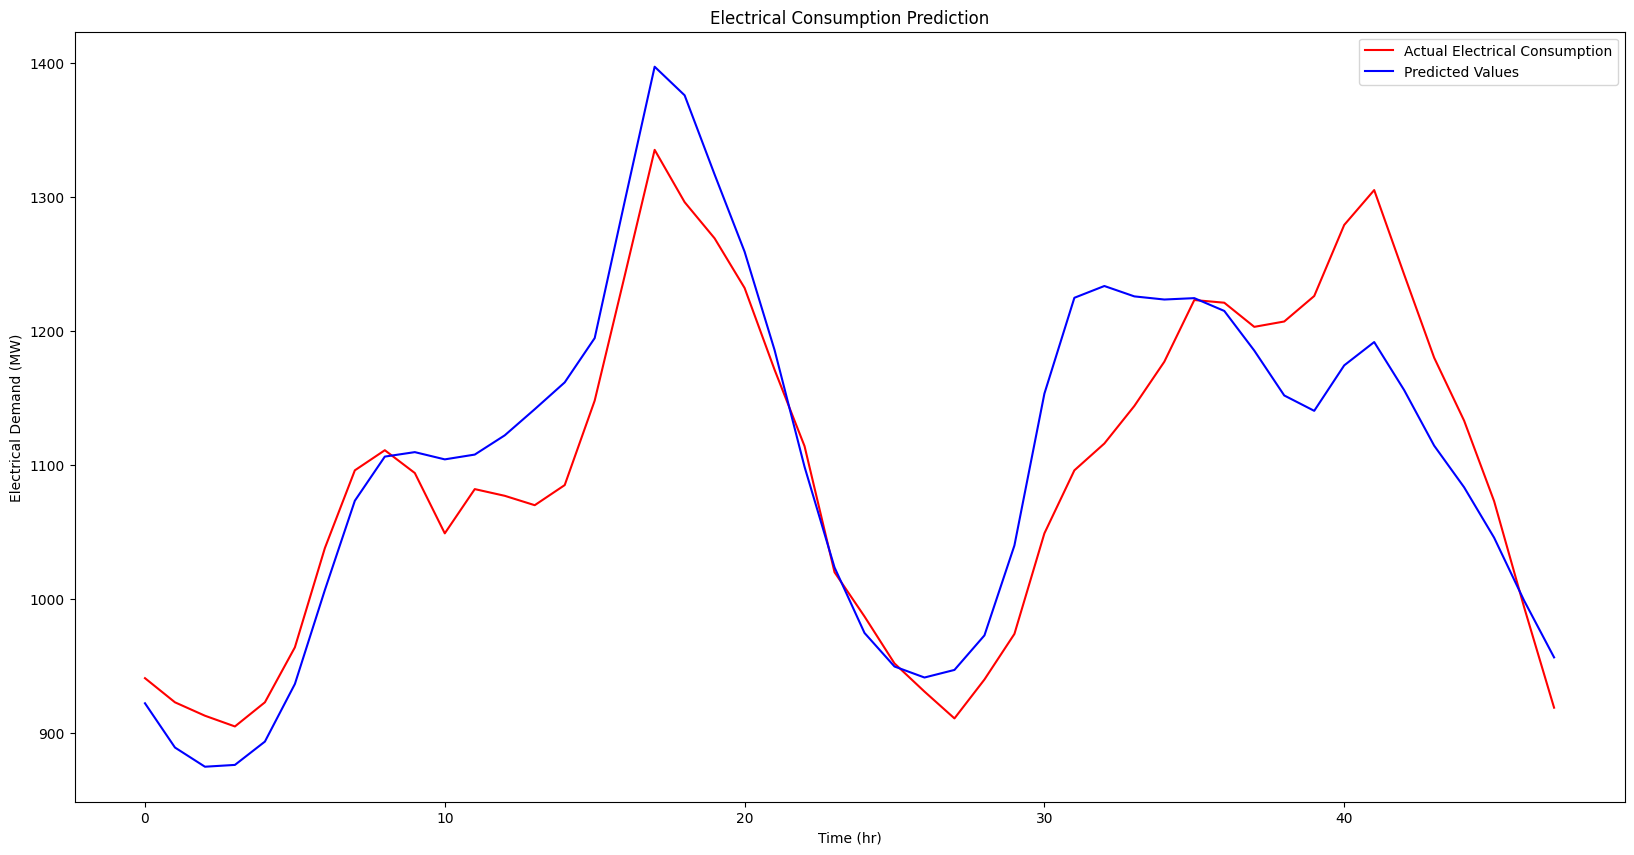

In [29]:
plt.plot(real_values, color = 'red', label = 'Actual Electrical Consumption')
plt.plot(predictions, color = 'blue', label = 'Predicted Values')

plt.title('Electrical Consumption Prediction')
plt.xlabel('Time (hr)')
plt.ylabel('Electrical Demand (MW)')
plt.legend()
plt.show()




In [30]:
import math
from sklearn.metrics import mean_squared_error
RMSE = math.sqrt(mean_squared_error(real_values,predictions))

display (RMSE)


56.03455999837447

In [31]:
def mean_absolute_percentage_error (y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

MAPE = mean_absolute_percentage_error(real_values,predictions)
display (MAPE)


np.float64(13.575159685648034)

In [32]:
from sklearn.metrics import r2_score
accuracy = r2_score(real_values,predictions)

display (accuracy)


0.7923403703656984